In [1]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain
import math
from scipy.misc import derivative
from sklearn.decomposition import TruncatedSVD
from scipy.optimize import differential_evolution
import random
import statistics
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import pairwise_kernels
from scipy import sparse
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity


from scipy.optimize import minimize
%matplotlib inline

Задание 1
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

* a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

* b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [3]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

In [202]:
def cosine(A):
    x = 0
    for i in A:
        y = list(i).index(np.min(i[np.nonzero(i)]))
        print(x, y)
        x += 1

In [203]:
pd = pairwise_distances(raitings, metric='cosine')

In [204]:
cosine(pd)

0 8
1 4
2 9
3 9
4 8
5 9
6 3
7 5
8 0
9 2


In [205]:
def func_svd(raitings,i):
    svd = TruncatedSVD(n_components=i)
    raitings_reduced = svd.fit_transform(raitings)
    return raitings_reduced

In [206]:
raitings_5=func_svd(raitings,5)

In [207]:
cosine(raitings_5)

0 1
1 2
2 1
3 2
4 1
5 2
6 3
7 4
8 4
9 1


Вывод: Cжатие признаковых описаний пользователя с 15 фильмов до 5-ти признаков, сохранило схожесть почти всех пользователей(7 из 10)

Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

 $2*tg(sin(x)+cos(2*x+3))*(cos(x)-2*sin(2*x+3))*cos-2(sin(x)+cos(2*x+3))$

In [82]:
def f(x):
    return np.tan((np.sin(x) + np.cos(2*x +3)))**2
print(f'Значение первой производной функции: {derivative(f, dx = 1e-6, x0=1.0, n=1)}')

Значение первой производной функции: 55.3859176464222


Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

In [2]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [3]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [4]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

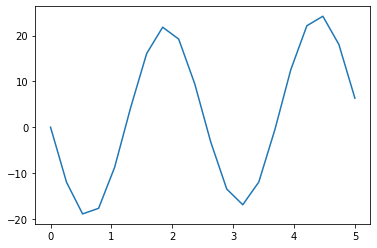

In [33]:
plt.plot(x, fx)
plt.show()

In [6]:
def error(params):
    error=0
    for i in range(len(x)):
        error=error+np.abs(fx[i] - f(x[i], params[0], params[1]))
        return error

In [48]:
bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(error, bounds, seed=42)
print(result)

     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 63
     nit: 1
 success: True
       x: array([-2.89241925, -3.24033743])


In [20]:
params=[-2.89241925, -3.24033743]
error(params)

0.0

TypeError: setp() missing 1 required positional argument: 'obj'

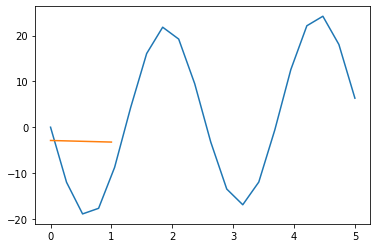

In [49]:
plt.plot(x, fx)
plt.plot(params)
plt.setp( color='red', linewidth=5)
plt.show()


Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних

In [144]:
elements = range(20)
probabilities = [0.05]*20
list_means=[]
for i in range(1000): 
    data=np.random.choice(elements, 50, p=probabilities)
    list_means.append(statistics.mean(data))

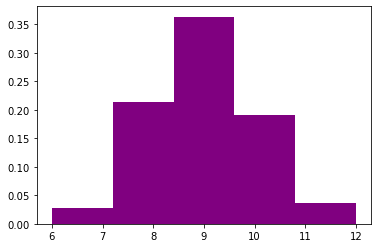

In [145]:
plt.hist(list_means, 5, density=True,color='purple')
plt.show()

Задание 5

Найдите собственные значения и собственные вектора матрицы (на python):

In [146]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [147]:
w, v = np.linalg.eig(m)

In [148]:
for i in range(len(w)):
    print('Собственное значение ' + str(w[i]))
    print('Собственный вектор ' + str(v[:,i]))

Собственное значение 3.0000000000000004
Собственный вектор [0.89442719 0.4472136 ]
Собственное значение -0.9999999999999996
Собственный вектор [-0.89442719  0.4472136 ]
